# Sicherheit der Schweizer Strassen

    — Eine Datenanalyse von Jonas Wyss, Roger Metzger und Benj Fassbind

Ablauf:
    
- Jonas: Begrüssung
- Roger: Fragestellung Use Case (Wie können wir leben auf Scheizer Strassen retten, Challenge: Was kann man aus einem Datensatz herauslesen)
- Jonas: Datenquelle, 
- Jonas: Konzeptionelles Datenmodell (ERD), Daten Vorstellen
- Jonas: Import 
- Jonas: Schema mit Beispiel
- Benj: Datenanalyse
  - Datenbankabfrage: 1. Technisch, 2. Nur noch Plots ohne technik

- Fragen Antworten Spiel (Roger und Benj):
  - R: Es sind doch eh nur die Besoffenen Autofahrer die am Wochenende einen Unfall machen
  - B: (Wochentag statistik mit Friday meme)
  
  - R: Ah dann werden sicher auf er Autobahn bei den grossen Crashes viele Peronen sterben
  - B: (Statistik tote/Strassentyp, absolut und relativ)
  
  - R: Gibt es dann eine besonders gefährliche Region in der Scheiz
  - B: (Map Statistik)
  
  - R: Jetzt habe ich keine Idee mehr, wie ist denn der Unfalltrend
  - B: (graphen ...)

In [4]:
from pathlib import Path
from bson.json_util import dumps

import matplotlib.pyplot as plt
import folium
import pandas as pd

import pymongo
import iplantuml

COLOR_LOOKUP = {
    "as1": "crimson",
    "as2": "#ED872D",
    "as3": "#B0BF1A",
    "n": "#103e7a"
}

from IPython.display import Markdown
display (Markdown(f"""
**Typographische elemente:**

- <span style="color: {COLOR_LOOKUP['as1']}">⬤</span> Unfall mit Toten
- <span style="color: {COLOR_LOOKUP['as2']}">⬤</span> Unfall mit Schwerverletzten
- <span style="color: {COLOR_LOOKUP['as3']}">⬤</span> Unfall mit Leichtverletzten
- <span style="color: {COLOR_LOOKUP['n']}">⬤</span> Alle Unfälle.

"""))

plt.rcParams['figure.dpi'] = 200

db = pymongo.MongoClient("mongodb://localhost").dbs


**Typographische elemente:**

- <span style="color: crimson">⬤</span> Unfall mit Toten
- <span style="color: #ED872D">⬤</span> Unfall mit Schwerverletzten
- <span style="color: #B0BF1A">⬤</span> Unfall mit Leichtverletzten
- <span style="color: #103e7a">⬤</span> Alle Unfälle.



## Technologiestack

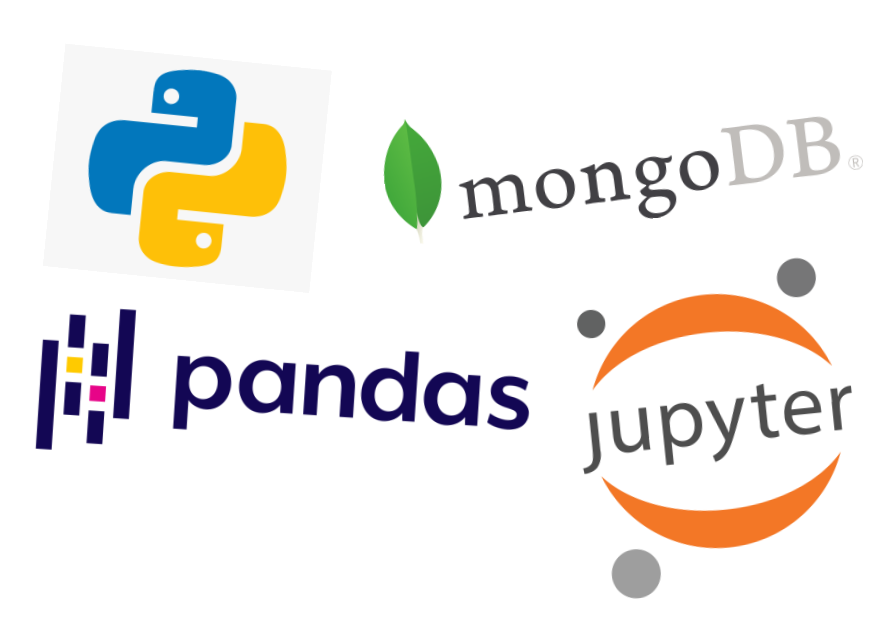

### Datenabfrage

```python
total_accident_by_year = pd.DataFrame(list(db.accidents.aggregate([
    {"$group" : {"_id": "$timestamp.year", "count": {"$sum": 1}}},
    {"$project": {
      "_id": 0,
      "year": "$_id",
      "count": 1,
    }},
    {"$sort": {"year": 1}},
])))
total_accident_by_year.set_index("year", inplace=True)
total_accident_by_year.plot(color=COLOR_LOOKUP["n"])
```

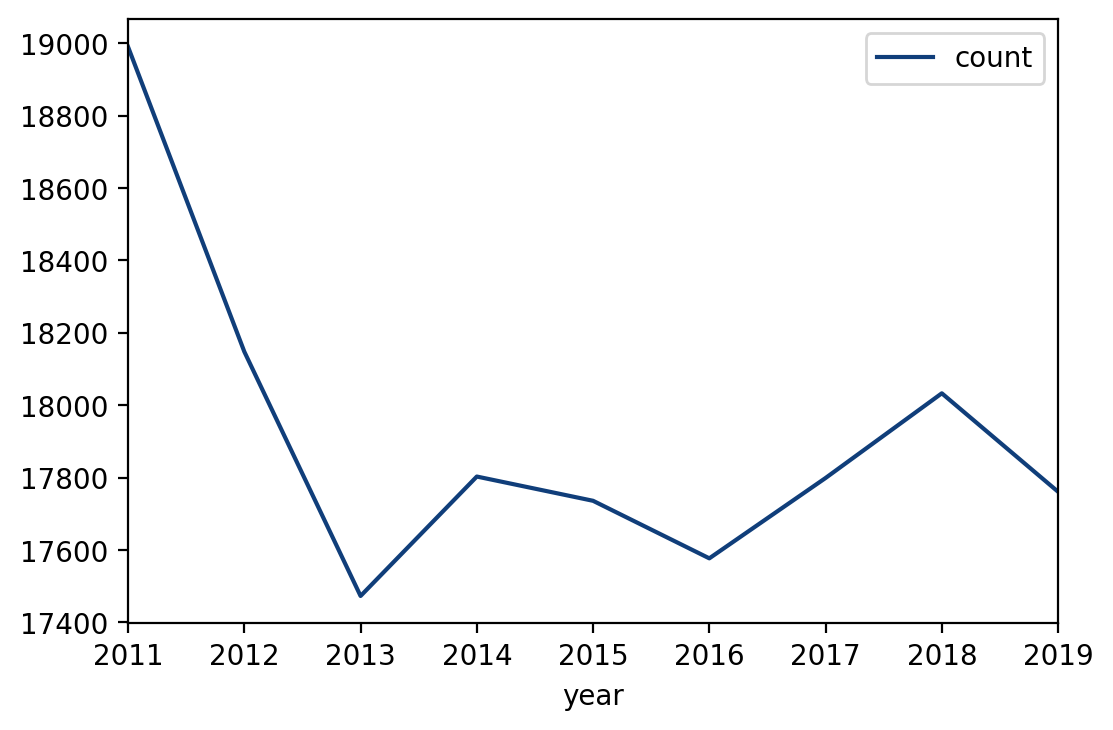

In [5]:
total_accident_by_year = pd.DataFrame(list(db.accidents.aggregate([
    {"$group" : {"_id": "$timestamp.year", "count": {"$sum": 1}}},
    {"$project": {
      "_id": 0,
      "year": "$_id",
      "count": 1,
    }},
    {"$sort": {"year": 1}},
])))
total_accident_by_year.set_index("year", inplace=True)
total_accident_by_year.plot(color=COLOR_LOOKUP["n"])

## Unfälle in der Schweiz

In [2]:
m = folium.Map(
    location=[46.316666, 8.2275124],
    tiles='Stamen Toner',
    zoom_start=8
)

for accident in db.accidents.find({"$expr": {"$eq": ["$severity.id", "as1"]}}):
    folium.Circle(
        radius=5,
        location=[accident['location']['coordinates'][1], accident['location']['coordinates'][0]],
        popup=f"{accident['timestamp']['month']}.{accident['timestamp']['year']}@{accident['timestamp']['hour']} - {accident['type']['name']}",
        color='crimson',
        fill=True,
    ).add_to(m)
m